In [1]:
import pyogrio as ogr
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import geopandas as gpd
from lonboard import Map, PolygonLayer
from lonboard.colormap import apply_categorical_cmap
import pandas as pd

In [2]:
data_pd = pd.read_csv("C:/Users/王小雅/1/cdp-mapping-systems/Data/dot_VZV_Leading_Pedestrian_Intervals_20240130.csv")

In [3]:
data_pd

,the_geom,MainStreet,CrossStree,Install_Da,LONG,LAT,X,Y
0,POINT (-74.0212160564291 40.61847166417737),86 Street,7 Avenue,06/04/2020 12:00:00 AM,-74.021216,40.618472,9.783600e+05,164603.000240
1,POINT (-74.01832673649814 40.61672647292833),86 Street,11 Avenue,06/04/2020 12:00:00 AM,-74.018327,40.616726,9.791620e+05,163967.000200
2,POINT (-74.01611841499845 40.61538459999361),86 Street,12 Avenue,06/04/2020 12:00:00 AM,-74.016118,40.615385,9.797750e+05,163478.000194
3,POINT (-74.01390658276848 40.61405366403936),86 Street,13 Avenue,06/04/2020 12:00:00 AM,-74.013907,40.614054,9.803890e+05,162993.000179
4,POINT (-74.01171284931088 40.61273366266546),86 Street,14 Avenue,06/04/2020 12:00:00 AM,-74.011713,40.612734,9.809980e+05,162512.000157
...,...,...,...,...,...,...,...,...
6138,POINT (-73.91419711775514 40.81626194621913),Westchester Avenue,Brook Avenue,12/22/2023 12:00:00 AM,-73.914197,40.816262,1.008000e+06,236675.000125
6139,POINT (-73.9066596345152 40.81717282750319),Westchester Avenue,Forest Avenue,12/22/2023 12:00:00 AM,-73.906660,40.817173,1.010086e+06,237009.000113
6140,POINT (-73.91194304446944 40.81604615805011),Westchester Avenue,St Anns Avenue,12/22/2023 12:00:00 AM,-73.911943,40.816046,1.008624e+06,236596.999953
6141,POINT (-73.9034961824973 40.81872373468347),Westchester Avenue,Union Avenue,12/22/2023 12:00:00 AM,-73.903496,40.818724,1.010961e+06,237574.999965


In [4]:
from shapely.geometry import Point

<Axes: >

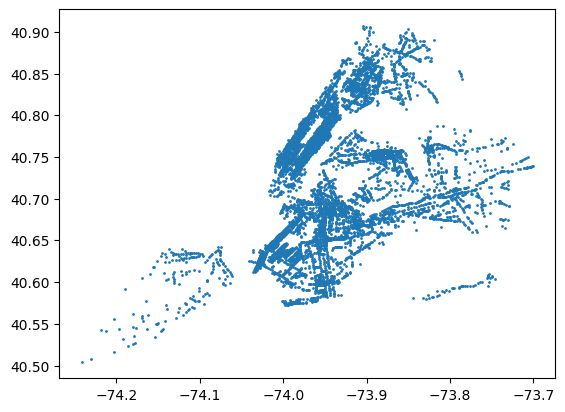

In [5]:
geometry = [Point(xy) for xy in zip(data_pd['LONG'], data_pd['LAT'])]
gdf = gpd.GeoDataFrame(data_pd, geometry=geometry)
gdf.plot(markersize=1)

In [6]:
geometry = [Point(xy) for xy in zip(data_pd['LONG'], data_pd['LAT'])]
gdf = gpd.GeoDataFrame(data_pd, geometry=geometry)

min_lat = 40.8
max_lat = 40.82
min_lon = -74.2
max_lon = -73.93

selected_points = gdf[(gdf['LAT'] >= min_lat) & (gdf['LAT'] <= max_lat) &
                (gdf['LONG'] >= min_lon) & (gdf['LONG'] <= max_lon)]

print(selected_points)


                                           the_geom       MainStreet  \
522     POINT (-73.9695048314831 40.80032927199029)  West End Avenue   
523    POINT (-73.96905666488645 40.80096044026755)  West End Avenue   
1027   POINT (-73.9443549763277 40.800662966186714)   Madison Avenue   
1028   POINT (-73.94389573436735 40.80129128572992)   Madison Avenue   
1029   POINT (-73.94343648492153 40.80191960428173)   Madison Avenue   
...                                             ...              ...   
5757   POINT (-73.96713944168586 40.80684460093533)  Riverside Drive   
5758  POINT (-73.96653188709159 40.808230511624174)  Riverside Drive   
5759   POINT (-73.96581272204669 40.80884237359986)  Riverside Drive   
5760   POINT (-73.96442455776754 40.81075502520771)  Riverside Drive   
5761  POINT (-73.96401965104228 40.811331291888294)  Riverside Drive   

           CrossStree              Install_Da       LONG        LAT  \
522   West 104 Street  01/18/2020 12:00:00 AM -73.969505  40.800

Text(0.5, 1.0, 'VZV Leading Pedestrian Intervals')

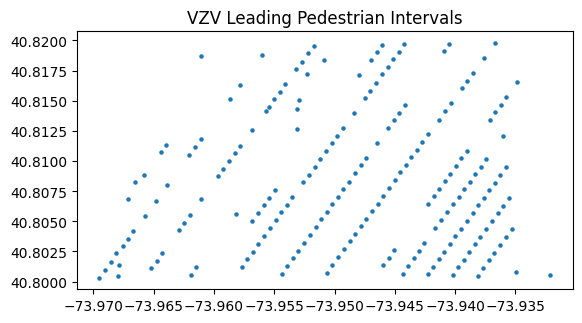

In [7]:
selected_points.plot(markersize=5)
plt.title("VZV Leading Pedestrian Intervals")

In [8]:
gdf_points = gpd.read_file('C:/Users/王小雅/1/cdp-mapping-systems/Data/My_usual_walking_path_frequent_spot.geojson')

<Axes: >

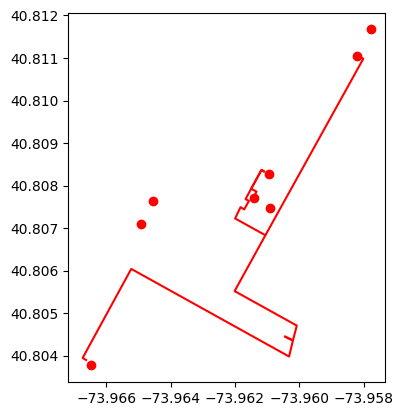

In [9]:
gdf_points.plot(color="red")

In [11]:
import contextily as ctx

d:\python\Lib\site-packages\contextily\tile.py:623: UserWarning: The inferred zoom level of 31 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


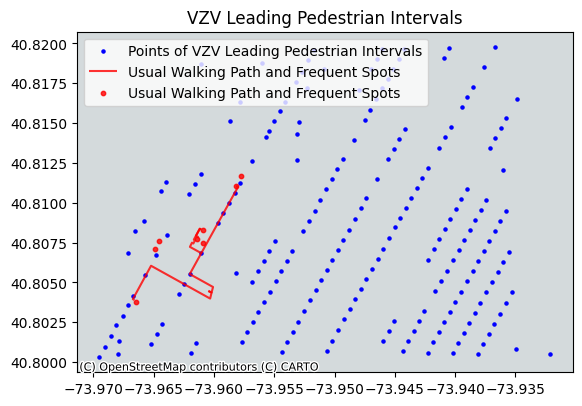

In [19]:
ax = selected_points.plot(color="blue",markersize=5, label="Points of VZV Leading Pedestrian Intervals")
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
gdf_points.plot(ax=ax, color="red", alpha=0.8,markersize=10,label="Usual Walking Path and Frequent Spots")
plt.title("VZV Leading Pedestrian Intervals")
ax.legend()